In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]


In [2]:
from sklearn.cluster import KMeans

In [3]:
from sklearn.metrics import silhouette_score
import pickle
kmeans_sil = []
kmeans_10 = None
for i in range(8,13):
    kmeans = KMeans(n_clusters = i, n_init=10)
    y_pred = kmeans.fit_predict(X)
    if (i == 10):
        kmeans_10 = y_pred
    sil_score = silhouette_score(X, kmeans.labels_)
    kmeans_sil.append(sil_score)
    print(f"Wskaźnik sylwetkowy dla {i} klastrów: {sil_score}")

kmeans_sil

Wskaźnik sylwetkowy dla 8 klastrów: 0.06018805010086789
Wskaźnik sylwetkowy dla 9 klastrów: 0.06399336983766231
Wskaźnik sylwetkowy dla 10 klastrów: 0.06818940451057384
Wskaźnik sylwetkowy dla 11 klastrów: 0.06886403006711848
Wskaźnik sylwetkowy dla 12 klastrów: 0.07308095029887186


[0.06018805010086789,
 0.06399336983766231,
 0.06818940451057384,
 0.06886403006711848,
 0.07308095029887186]

In [4]:
with open('kmeans_sil.pkl', 'wb') as f:
    pickle.dump(kmeans_sil,f)

In [5]:
kmeans_10

array([2, 3, 8, ..., 2, 1, 3], dtype=int32)

In [6]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, kmeans_10)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)



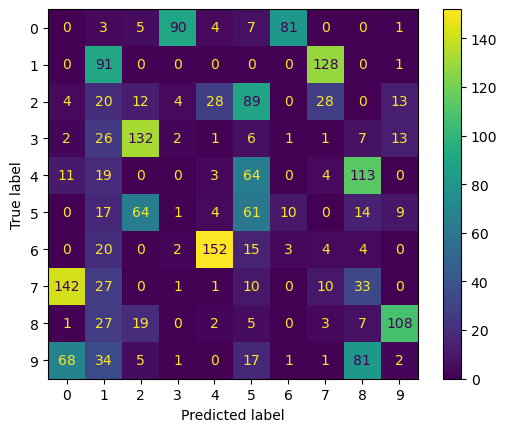

In [7]:
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [8]:
confusion_matrix

array([[  0,   3,   5,  90,   4,   7,  81,   0,   0,   1],
       [  0,  91,   0,   0,   0,   0,   0, 128,   0,   1],
       [  4,  20,  12,   4,  28,  89,   0,  28,   0,  13],
       [  2,  26, 132,   2,   1,   6,   1,   1,   7,  13],
       [ 11,  19,   0,   0,   3,  64,   0,   4, 113,   0],
       [  0,  17,  64,   1,   4,  61,  10,   0,  14,   9],
       [  0,  20,   0,   2, 152,  15,   3,   4,   4,   0],
       [142,  27,   0,   1,   1,  10,   0,  10,  33,   0],
       [  1,  27,  19,   0,   2,   5,   0,   3,   7, 108],
       [ 68,  34,   5,   1,   0,  17,   1,   1,  81,   2]])

In [9]:
confusion_matrix.shape
arg_max = set()
for i in range(0,confusion_matrix.shape[0]):
    arg = np.argmax(confusion_matrix[i])
    print(arg)
    arg_max.add(arg)


arg_max_list = list(arg_max)
arg_max_list.sort()
with open('kmeans_argmax.pkl','wb') as f:
    pickle.dump(arg_max_list,f)

arg_max_list

3
7
5
2
8
2
4
0
9
8


[0, 2, 3, 4, 5, 7, 8, 9]

In [10]:
X = mnist["data"]
y = mnist["target"]


In [11]:
distances = []
for x1 in X[:300]:
    for x2 in X:
        dist = np.linalg.norm(x1-x2)
        distances.append(dist)



[0.0,
 2387.111643807218,
 2773.149112471235,
 2554.8197588088283,
 2672.467212146858,
 2582.292392429641,
 2423.5917560513362,
 2169.9649766758907,
 2375.164625873331,
 2569.3078834581115,
 2139.8329374042264,
 2867.4593283950862,
 2666.0952721161334,
 2627.5760693079847,
 2377.237262033388,
 2627.911908721447,
 2452.252026199591,
 2305.5413680955717,
 2361.561771370802,
 2286.1800016621614,
 3153.737465294155,
 2661.511976302192,
 2430.517228904169,
 2562.744622470214,
 2413.886699909505,
 2731.21840942829,
 2490.662160952384,
 2388.085216234965,
 2841.7714545684353,
 2702.0340486381738,
 2590.299789599652,
 2627.523548895423,
 2393.2601195858338,
 2372.316378563365,
 2491.2386477413197,
 2608.1508775375705,
 2382.3291124443745,
 2612.5728697971276,
 2544.222867596312,
 2396.116232573036,
 2401.950041112429,
 2161.5577716082444,
 2387.229775283477,
 2143.5430949715005,
 2287.7751200675298,
 2617.665181034427,
 2534.771192829838,
 2496.3845857559686,
 2232.1556845345713,
 1917.8297630

In [12]:
distances.sort()
list(filter(lambda a: a !=0.0, distances))[:10]

with open('dist.pkl', 'wb') as f:
    pickle.dump(list(filter(lambda a: a !=0.0, distances))[:10],f)

In [13]:
from statistics import mean 
s = mean(list(filter(lambda a: a !=0.0, distances))[:3])
s

492.48538522780564

In [14]:
eps_min  = s
eps_max = s+ 0.1*s
step = 0.04 * s
eps_values = np.arange(eps_min, eps_max, step)
eps_values

array([492.48538523, 512.18480064, 531.88421605])

In [15]:
X = mnist["data"]
dbscan_len = []
from sklearn.cluster import DBSCAN
for eps in eps_values:
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(X)
    print(f"DBSCAM eps={eps} : {np.unique(dbscan.labels_).size}")
    dbscan_len.append(np.unique(dbscan.labels_).size)

dbscan_len

DBSCAM eps=492.48538522780564 : 8
DBSCAM eps=512.1848006369179 : 9
DBSCAM eps=531.8842160460301 : 14


[8, 9, 14]

In [16]:
with open('dbscan_len.pkl','wb') as f:
    pickle.dump(dbscan_len,f)